## Load Bigmart Sales data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
bigmart = pd.read_csv('train_bm.csv')

In [3]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigmart.shape

(8523, 12)

Here are the dtypes

In [5]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Many variables are categorical with the data type 'object'. Lets convert these into numbers. We will use one hot encoding here.

So for a single variable - Item Type, we have the following Categories:

In [6]:
bigmart['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [7]:
pd.get_dummies(bigmart['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


Doing it for all the variables - 

In [8]:
bigmart_encoded = pd.get_dummies(bigmart)
bigmart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


We have two problems here: 

#### Problem 1:
Look at the newly created variables *'Outlet_Size_High 	Outlet_Size_Medium 	Outlet_Size_Small'*, the order between these variables is destroyed. As a result we are missing out on some important information.  

In [10]:
bigmart_encoded[['Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']].head()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,1,0,0


#### Problem 2
The number of features has increased from 12 to 1600, where maximum values are 0

In [14]:
bigmart_encoded.shape, bigmart.shape

((8523, 1605), (8523, 12))

In [13]:
bigmart_encoded[['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       'Item_Identifier_DRB13', 'Item_Identifier_DRB24',
       'Item_Identifier_DRB25', 'Item_Identifier_DRB48',
       'Item_Identifier_DRC01', 'Item_Identifier_DRC12',
       'Item_Identifier_DRC13', 'Item_Identifier_DRC24',
       'Item_Identifier_DRC25', 'Item_Identifier_DRC27',
       'Item_Identifier_DRC36', 'Item_Identifier_DRC49',
       'Item_Identifier_DRD01', 'Item_Identifier_DRD12',
       'Item_Identifier_DRD13', 'Item_Identifier_DRD15',
       'Item_Identifier_DRD24', 'Item_Identifier_DRD25',
       'Item_Identifier_DRD27', 'Item_Identifier_DRD37',
       'Item_Identifier_DRD49']].head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Problem 1 solution

In [41]:
from sklearn.preprocessing import LabelEncoder

In [44]:
bigmart['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [43]:
le = LabelEncoder()
le.fit_transform(['Small', 'Medium', 'High'])

array([2, 1, 0])

Label encoder uses the alphabetical order. 

In [46]:
bigmart['Outlet_Size'] = bigmart['Outlet_Size'].map({'Small': 0,
                                                     'Medium': 1,
                                                     'High': 2})

In [47]:
bigmart['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    2.0
Name: Outlet_Size, dtype: float64

So that solves the first challenge we encountered. Now we'll see how to deal with high cardinality.

## Problem 2 solution

Lets first understand why did this happen? 

In [16]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
bigmart.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [17]:
bigmart['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDT07     9
FDU12     9
FDW49     9
FDP25     9
NCY18     9
NCQ06     9
FDF56     9
FDX31     9
FDF52     9
FDG09     9
FDO19     9
FDQ40     9
FDV38     9
NCL31     9
FDW26     9
DRE49     9
FDV60     9
NCB18     9
NCI54     9
DRN47     9
FDX20     9
NCJ30     9
NCF42     9
FDD38     9
FDX04     9
NCX05     8
FDR44     8
FDR46     8
         ..
DRE01     2
FDU09     2
DRG25     2
FDI36     2
FDW10     2
FDE38     2
NCX53     2
FDE39     2
FDR03     2
FDF38     2
FDB10     2
NCV18     2
FDG28     2
DRI59     2
DRL59     2
NCC55     2
FDD48     2
FDR57     2
FDW58     2
FDD22     2
DRC24     2
FDN52     1
FDK57     1
FDY43     1
FDC23     1
FDT35     1
FDE52     1
FDQ60     1
DRF48     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [20]:
temp = bigmart['Item_Identifier'].value_counts()
temp = pd.DataFrame(temp)
temp.head()

,Item_Identifier
FDW13,10
FDG33,10
FDT07,9
FDU12,9
FDW49,9


In [21]:
temp['Item_Identifier_count'] = temp['Item_Identifier']
temp['Item_Identifier'] = temp.index

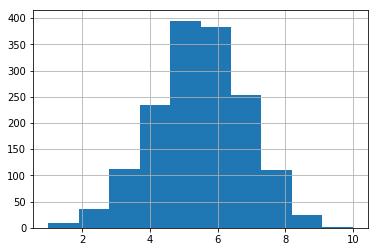

In [27]:
temp['Item_Identifier_count'].hist()

In [28]:
bigmart = pd.merge(bigmart, temp, on='Item_Identifier', how='left')
for i in range(0, 10):
    if bigmart['Item_Identifier_count'][i] < 4:
        bigmart['Item_Identifier'][i] = 'other'

/home/aishwarya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
bigmart.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_count
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,8
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,7
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6
5,other,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,3
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,8
